<a href="https://colab.research.google.com/github/songhyeonjun/Python/blob/master/%EB%B9%85%EC%BF%BC%EB%A6%AC%20homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'lyrical-star-379810' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=lyrical-star-379810:US:bquxjob_326b5684_186c06cadfd)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_326b5684_186c06cadfd') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT
position_id  
, position
  , SPLIT(SPLIT(jd, '주요업무')[safe_offset(1)], '자격요건')[safe_offset(0)] AS responsibilities 
  , SPLIT(SPLIT(SPLIT(jd, '주요업무')[safe_offset(1)], '자격요건')[safe_offset(1)], '우대사항')[safe_offset(0)] AS requirements
  , SPLIT(SPLIT(SPLIT(SPLIT(jd, '주요업무')[safe_offset(1)], '자격요건')[safe_offset(1)], '우대사항')[safe_offset(1)], '혜택 및 복지')[safe_offset(0)] AS preference
  , annual_from 
  , annual_to  
  , GENERATE_ARRAY(annual_from, annual_to, 1) AS target_annual 
  FROM wanted_data_challenge.wanted_position
#WHERE 쓰지 않도록 하겠습니다.


#position_id |  position  | responsibilities | requirements | preference | annual_from | annual_to | target_annual 
# 회사소개 , 주요업무, 자격요건, 우대사항, 복지 및 혜택 



# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_326b5684_186c06cadfd') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results[:5]

,position_id,position,responsibilities,requirements,preference,annual_from,annual_to,target_annual
0,141026,[겨울인턴] Data Analyst,\n1. 데이터 추출 및 분석 지원\n\n• 실무팀 과제 수행에 필요한 데이터 추출...,"\n• 온라인 비즈니스 데이터 분석 방법에 대한 이해도가 높은 분 (AARRR, R...","\n• R, Python 등의 고수준 스크립트 언어 활용 능력을 보유하신 분\n• ...",0,1,"[0, 1]"
1,121637,Data Analyst (신입),"\n• 전사적으로 데이터에 기반한 최적의 서비스적인, 사업적인 의사결정을 내릴 수 ...","\n• 사용자분들께 정말 좋은 서비스, 놀라운 경험을 제공하고 싶은 마음을 가지신 ...",\n• 실제 모바일 서비스 관련 데이터 분석 업무 경험이 있으신 분\n• Table...,0,1,"[0, 1]"
2,117995,[하계인턴] 데이터분석가,\n• 데이터분석팀 팀원들과 함께 머신러닝 기반 자동 재배치 시스템 개발 프로젝트에...,\n• Python을 활용한 데이터 분석과 지도학습 머신러닝 모델을 수립한 경험이 ...,\n• 공공 자전거 데이터 혹은 공간 데이터를 다루거나 분석한 경험이 있으신 분\n...,0,1,"[0, 1]"
3,115354,[하계인턴] Data Analyst,\n[콴다 Data Analyst의 역할은?] \n• 목적 조직이 맡은 서비스/비즈...,"\n[이런 분이면 좋겠습니다.]\n• Raw data를 가지고, 원하는 schema...",\n[기타 사항]\n• 제출 서류: 자유 양식의 국문 이력서(PDF)\n• 근무 형...,0,1,"[0, 1]"
4,115258,[하계인턴] Data Analyst,"\n• Raw data를 가지고, 원하는 schema 의 data로 가공하는 데 능...",\n[콴다 Data Analyst의 역할은?]\n•목적 조직이 맡은 서비스/비즈니스...,None,0,1,"[0, 1]"


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
results.describe()

,position_id,annual_from,annual_to
count,388.000000,388.000000,388.000000
mean,86662.932990,2.548969,11.293814
std,32339.246062,1.735828,15.518307
min,33147.000000,0.000000,1.000000
25%,56930.250000,1.000000,5.000000
50%,87868.500000,3.000000,10.000000
75%,110374.500000,3.000000,10.000000
max,146629.000000,10.000000,99.000000


## word cloud 형성을 위찬 패키지 설치

In [ ]:
!pip install krwordrank

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from krwordrank.word import KRWordRank
import numpy as np

df = results.copy() # results 복사 datafram

df['responsibilities'] = df['responsibilities'].replace(np.nan, '없음')
df['requirements'] = df['requirements'].replace(np.nan, '없음')
df['preference'] = df['preference'].replace(np.nan, '없음')

df.head(5) # 가장 상단의 5줄만 보여줌

,position_id,position,responsibilities,requirements,preference,annual_from,annual_to,target_annual
0,141026,[겨울인턴] Data Analyst,\n1. 데이터 추출 및 분석 지원\n\n• 실무팀 과제 수행에 필요한 데이터 추출...,"\n• 온라인 비즈니스 데이터 분석 방법에 대한 이해도가 높은 분 (AARRR, R...","\n• R, Python 등의 고수준 스크립트 언어 활용 능력을 보유하신 분\n• ...",0,1,"[0, 1]"
1,121637,Data Analyst (신입),"\n• 전사적으로 데이터에 기반한 최적의 서비스적인, 사업적인 의사결정을 내릴 수 ...","\n• 사용자분들께 정말 좋은 서비스, 놀라운 경험을 제공하고 싶은 마음을 가지신 ...",\n• 실제 모바일 서비스 관련 데이터 분석 업무 경험이 있으신 분\n• Table...,0,1,"[0, 1]"
2,117995,[하계인턴] 데이터분석가,\n• 데이터분석팀 팀원들과 함께 머신러닝 기반 자동 재배치 시스템 개발 프로젝트에...,\n• Python을 활용한 데이터 분석과 지도학습 머신러닝 모델을 수립한 경험이 ...,\n• 공공 자전거 데이터 혹은 공간 데이터를 다루거나 분석한 경험이 있으신 분\n...,0,1,"[0, 1]"
3,115354,[하계인턴] Data Analyst,\n[콴다 Data Analyst의 역할은?] \n• 목적 조직이 맡은 서비스/비즈...,"\n[이런 분이면 좋겠습니다.]\n• Raw data를 가지고, 원하는 schema...",\n[기타 사항]\n• 제출 서류: 자유 양식의 국문 이력서(PDF)\n• 근무 형...,0,1,"[0, 1]"
4,115258,[하계인턴] Data Analyst,"\n• Raw data를 가지고, 원하는 schema 의 data로 가공하는 데 능...",\n[콴다 Data Analyst의 역할은?]\n•목적 조직이 맡은 서비스/비즈니스...,없음,0,1,"[0, 1]"


# 0 ~ 3년차 공고 

## import

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

## 한글폰트 적용

In [ ]:
#한글폰트 지원이 되지 않기 때문에 별도로 이걸 깔아줘야한다.
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
#mpl.font_manager._rebuild()
#[출처] [Google Colab] 구글 코랩 한글 적용 문제 대응, Matplotlib|작성자 넬티아

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 128216 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


## 0 ~ 3년차 추출

In [ ]:
df2 = df[df['annual_to'] <= 3]

## 주요업무, 요구사항, 우대사항 리스트로 변환

In [ ]:
responsibilities = df2['responsibilities'].values.tolist()
requirements = df2['requirements'].values.tolist()
preference = df2['preference'].values.tolist()

print(responsibilities, requirements, preference, sep='\n')


['\n1. 데이터 추출 및 분석 지원\n\n• 실무팀 과제 수행에 필요한 데이터 추출 및 분석을 지원합니다.\n• 프로덕트 개선을 위한 A/B 테스트 설계에 참여하고 결과를 분석합니다.\n\n\n2. ad-hoc 데이터 분석 수행\n\n• 주요 비즈니스 의사결정에 필요한 ad-hoc 데이터 분석을 수행합니다. \n• 주요 KPI 모니터링 및 이슈 발생 시 deep-dive하여 데이터를 분석합니다.\n\n\n3. 데이터 시각화 및 분석 환경 개선\n\n• 성과 모니터링에 필요한 대시보드를 만들고 관리합니다.\n• 데이터 분석 환경을 개선하고 관리합니다.\n\n', '\n• 전사적으로 데이터에 기반한 최적의 서비스적인, 사업적인 의사결정을 내릴 수 있도록 하는 일련의 활동들을 lead, guide, and support\n• 분석을 통한 데이터에 기반한 intelligence와 action item 도출\n• Intelligence와 action item이 실제 서비스에 잘 반영될 수 있도록 사업/서비스기획/디자인/개발팀 등과 적극적 협력\n• Action item의 검증을 위한 적절한 데이터를 수집하기 위한 로거 정의 및 설계\n• 각 서비스의 핵심 지표에 대한 정의 및 동료들에게 인사이트를 제공할 수 있는 대시보드 제작 / 모니터링 수행\n• 동료들의 데이터 추출 요청에 대한 지원\n\n', '\n• 데이터분석팀 팀원들과 함께 머신러닝 기반 자동 재배치 시스템 개발 프로젝트에서 예측 모델 수립 작업을 담당합니다.\n• 데이터분석팀의 기존 분석 모델의 개선점을 찾아 함께 개선하는 작업도 수행합니다.\n• 이 외에도 관심 있는 주제에 대해 자유롭게 분석을 수행하여, 실제 전략에 반영할 수 있는 인사이트를 발굴하실 수 있습니다.\n\n', '\n[콴다 Data Analyst의 역할은?] \n• 목적 조직이 맡은 서비스/비즈니스 주제의 성패를 가늠할 수 있는 적절한 최상위 metric을 정의합니다. 최상위 metric은 "최상위"인 만큼 여러가지 요소들이 결합된 복

## 주요업무 KRWordRank 및 워드클라우드 시각화

In [ ]:
wordrank_extractor = KRWordRank(
    min_count = 3, # 단어 최소 출현 빈도수
    max_length = 15, # 단어의 charater 길이의 최대 값
    verbose = True
)

bata = 0.85 # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(responsibilities, bata, max_iter) # 함수 실행 시 키워드, 랭크, 그래프 output으로 표시

stopwords = {'있는','분이면', '통해','분석','데이터', '위한', '최상위', '필요한', '목적','테스트','어떤','관련','함께','그렇게','있습니다.'}  #걸렀으면 하는 stopwords
passwords = {word:score for word, score in sorted(   
keywords.items(), key=lambda x:-x[1])[:100] if not (word in stopwords)}  #stopwords는 제외된 keywords 탑 300개

# 자주 반복되는 단어 top 30개 추출해서 프린트
for word, r, in sorted(passwords.items(), key=lambda x : x[1], reverse=True)[:30] :
  print((word, r))

scan vocabs ... 
num vocabs = 1229
done
('metric', 4.4985143769067655)
('정의한', 2.862686558510975)
('위해', 2.720828625016424)
('대한', 2.623104826246213)
('다양한', 2.5803468290907543)
('Google', 2.491877790531492)
('설계', 2.451082341272071)
('수집', 2.407636266740328)
('도출', 2.3586586411862425)
('Ana', 2.225219097505107)
('가설', 2.2120945264010277)
('프로덕트', 2.144427161626885)
('서비', 2.0616327412879984)
('결과를', 2.032929691507112)
('data를', 2.0015655895818036)
('합니다.', 1.9890185789462178)
('등과', 1.9453848481093532)
('조직', 1.8917369980288559)
('같은', 1.8757149540424018)
('인사이트', 1.871338532445451)
('일을', 1.8378177252355714)
('로그', 1.8265868950698576)
('개선', 1.7911843525585271)
('기반', 1.789778661237201)
('의사결정', 1.779649839907123)
("'이", 1.733351462461513)
('개발', 1.6625892258593291)
('대시', 1.6161973795453712)
('2.', 1.540980116696697)
('동료들에게', 1.517842447711247)


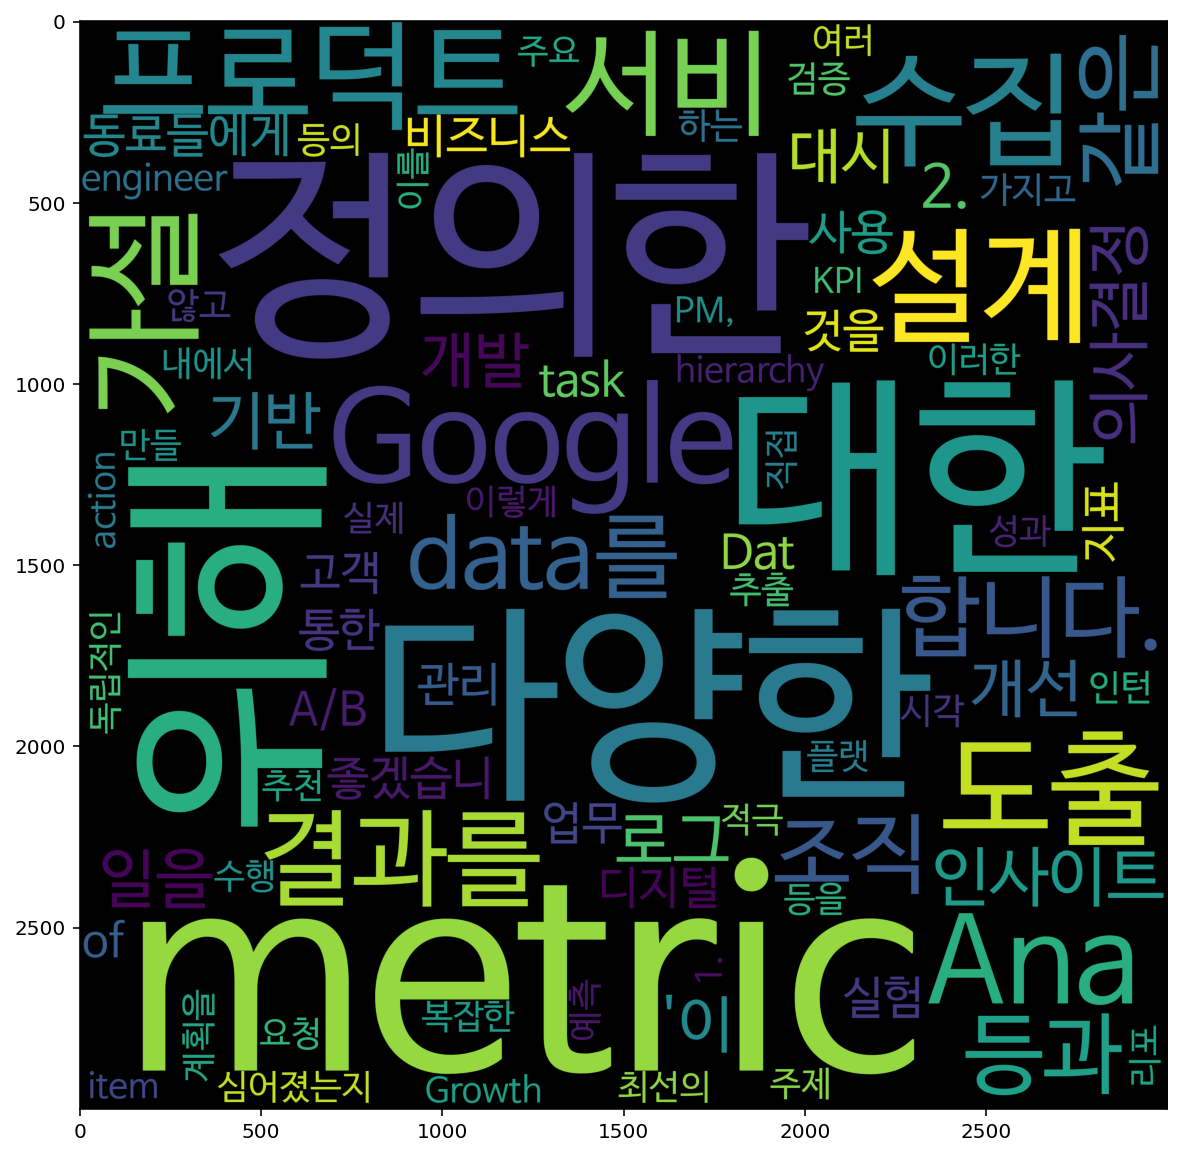

In [ ]:
wc = WordCloud(font_path = fontpath, width = 1000, height = 1000, scale = 3.0, max_font_size=250)
gen = wc.generate_from_frequencies(passwords)
plt.figure(figsize=(10, 10))
plt.imshow(gen)

### 주요업무 워드클라우드 결과
- metric, 설계, 수집, 도출 등의 단어가 나온것을 확인

## 요구사항 KRWordRank 및 워드클라우드 시각화

In [ ]:
wordrank_extractor = KRWordRank(
    min_count = 3, # 단어 최소 출현 빈도수
    max_length = 15, # 단어의 charater 길이의 최대 값
    verbose = True
)

bata = 0.85 # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(requirements, bata, max_iter) # 함수 실행 시 키워드, 랭크, 그래프 output으로 표시

stopwords = {'분석','데이터', '위한', '대한', '경험', '분이면','이상','관련','활용','위해','있으신', '있는','이해','등을','또는','어떤'}  #걸렀으면 하는 stopwords
passwords = {word:score for word, score in sorted(   
keywords.items(), key=lambda x:-x[1])[:100] if not (word in stopwords)}  #stopwords는 제외된 keywords 탑 300개

# 자주 반복되는 단어 top 30개 추출해서 프린트
for word, r, in sorted(passwords.items(), key=lambda x : x[1], reverse=True)[:30] :
  print((word, r))

scan vocabs ... 
num vocabs = 1033
done
('Cohort,', 6.498962336023187)
('능력', 3.6095740031983516)
('metric', 3.5418750040828515)
('SQL', 3.362723041478361)
('Google', 2.609128587211941)
('data를', 2.314807622559683)
('원하는', 2.313917238639937)
('것을', 2.2839406056245193)
('목적', 2.210771849191067)
('커뮤니케이션', 2.080419875143818)
('최상위', 2.0245660882234384)
('통해', 2.0215213517628374)
('있고,', 1.8706164960047262)
('좋겠습', 1.7741484727987107)
('가능한', 1.7586539369771437)
('Analyst', 1.757001600948989)
('하는', 1.7109161786053364)
('등의', 1.7089386446644306)
('조직', 1.6316294165901093)
('능숙하신', 1.6251867529179105)
('Dat', 1.6247405586744943)
('원활한', 1.61906683927748)
('사용', 1.615847334854465)
('다양한', 1.594806079056422)
('task', 1.4947456079881278)
('Funnel', 1.4703663026597562)
('지원', 1.4041227500953188)
('서비', 1.399170660110781)
('언어', 1.3990806811988596)
('프로', 1.368111295654038)


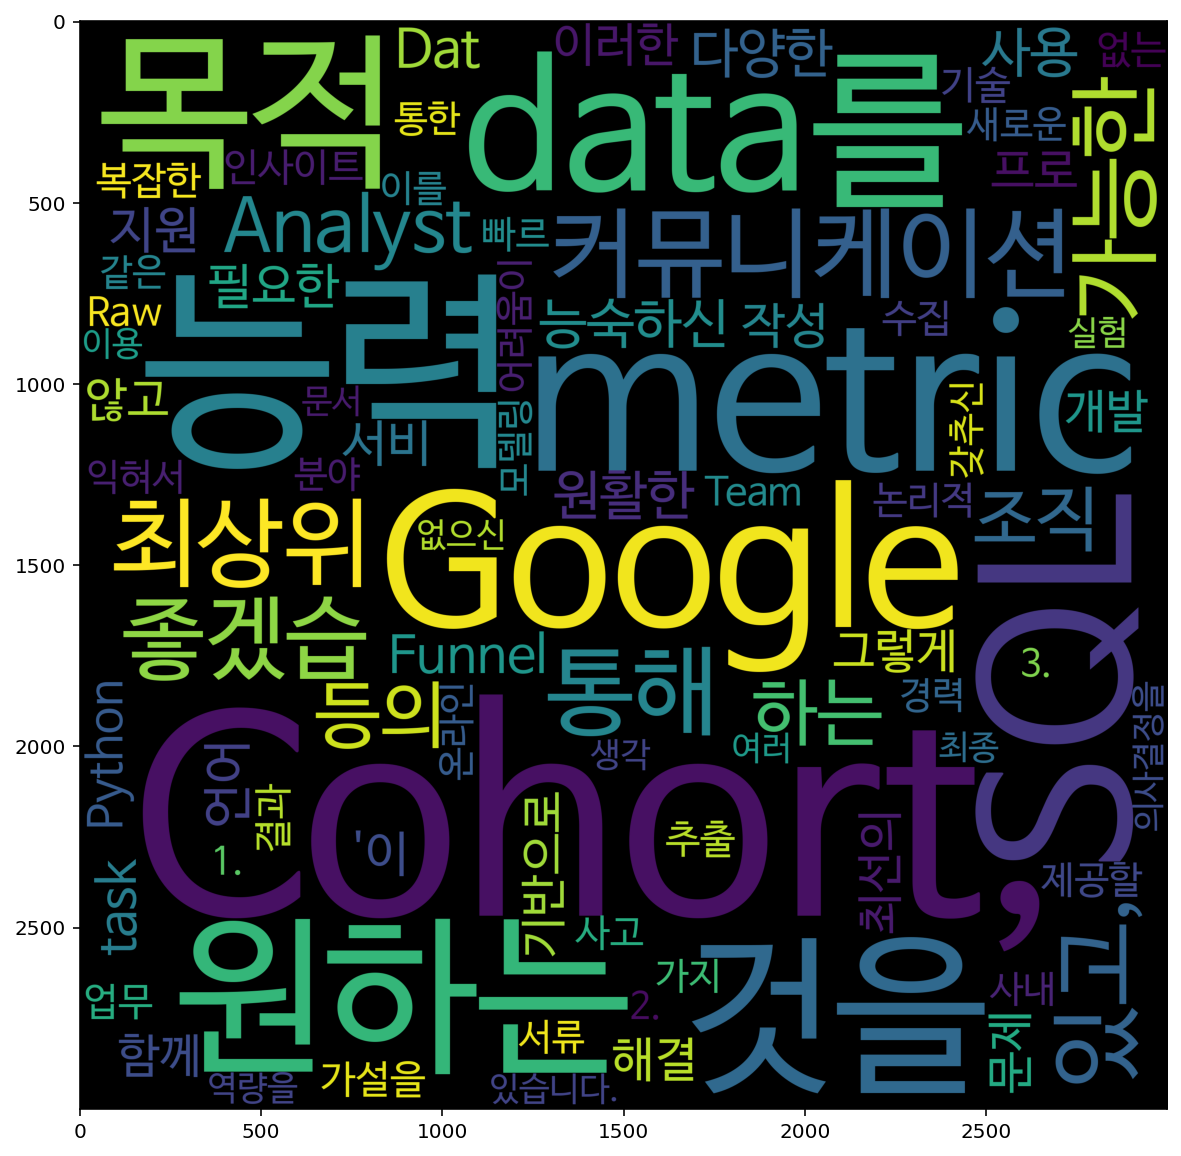

In [ ]:
wc = WordCloud(font_path = fontpath, width = 1000, height = 1000, scale = 3.0, max_font_size=250)
gen = wc.generate_from_frequencies(passwords)
plt.figure(figsize=(10, 10))
plt.imshow(gen)

### 요구사항 워드클라우드 결과
- metCohortric, Google, SQL, 능력 등의 단어가 나온것을 확인

## 우대사항 KRWordRank 및 워드클라우드 시각화

In [ ]:
wordrank_extractor = KRWordRank(
    min_count = 3, # 단어 최소 출현 빈도수
    max_length = 15, # 단어의 charater 길이의 최대 값
    verbose = True
)

bata = 0.85 # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(preference, bata, max_iter) # 함수 실행 시 키워드, 랭크, 그래프 output으로 표시

stopwords = {'분석','데이터', '대한', '대한', 'Data', '관련','Tag','등의','등)','혹은','사용', '있으','있는','또는','또는','어떤'}  #걸렀으면 하는 stopwords
passwords = {word:score for word, score in sorted(   
keywords.items(), key=lambda x:-x[1])[:100] if not (word in stopwords)}  #stopwords는 제외된 keywords 탑 300개

# 자주 반복되는 단어 top 30개 추출해서 프린트
for word, r, in sorted(passwords.items(), key=lambda x : x[1], reverse=True)[:30] :
  print((word, r))

scan vocabs ... 
num vocabs = 596
done
('경험', 6.306785323385795)
('Google', 6.2221653811444995)
('Analytics,', 3.7910067587435528)
('활용', 2.64558016793899)
('이해', 2.5658381032930047)
('tools', 2.370164119558857)
('서비스', 2.188378881083922)
('R,', 1.795124437132671)
('통계', 1.5641463997357552)
('Manager,', 1.5624258621701732)
('기반의', 1.5021900108171748)
('수학', 1.3337746875843801)
('보유', 1.2851263896019023)
('근무', 1.2783477113662736)
('문제를', 1.2574818516935884)
('진행한', 1.2193556667184962)
('실제', 1.2192682770219307)
('통한', 1.1966957164748813)
('능력', 1.1661716279015408)
('산업에', 1.1535137837475888)
('하는', 1.146292372074932)
('Firebase', 1.117952723529699)
('분야', 1.086568735888874)
('위한', 1.0677537228625735)
('Pyth', 1.067674254619162)
('테스트', 1.0470714808053123)
('BI', 1.0384962372760413)
('읽고', 1.0149087638986658)
('전공', 0.9918684683271463)
('Amplitude', 0.9738848586667801)


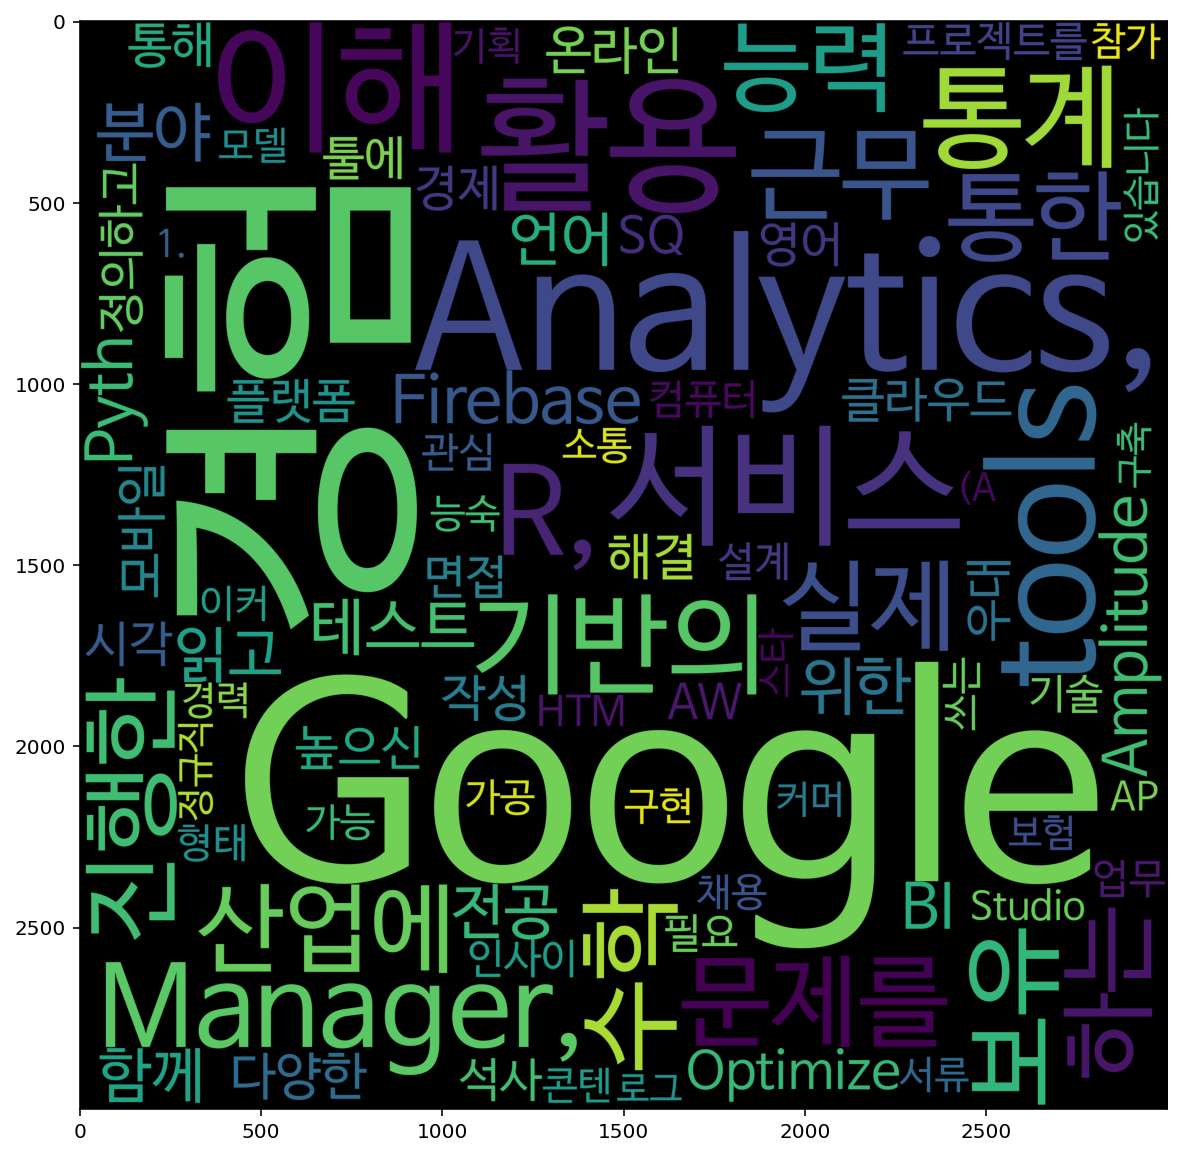

In [ ]:
wc = WordCloud(font_path = fontpath, width = 1000, height = 1000, scale = 3.0, max_font_size=250)
gen = wc.generate_from_frequencies(passwords)
plt.figure(figsize=(10, 10))
plt.imshow(gen)

### 우대사항 워드클라우드 결과
- 경험, R, 활용, tools 등의 단어가 나온것을 확인